<a href="https://colab.research.google.com/github/sanjana-mishra/Python/blob/main/partD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# load packages
# make sure to install the pacakge "tqdm" for the progress bar when training.
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torchvision.utils import save_image
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import imageio
import matplotlib.image as mpimg
from scipy import ndimage

path_prefix = " "

In [2]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
trainTransform  = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), torchvision.transforms.Normalize((0.1307,), (0.3081,))])
trainset = torchvision.datasets.FashionMNIST(root='{}/./data'.format(path_prefix),  train=True,download=True, transform=transform)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting  /./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to  /./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting  /./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to  /./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting  /./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to  /./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting  /./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to  /./data/FashionMNIST/raw



In [3]:
from google.colab import drive
drive.mount('/content/gdrive')
path_prefix = "/content/gdrive/MyDrive/CMPT_726Fall2021_A3"

import sys
sys.path.insert(1, path_prefix)
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive
Mounted at /content/gdrive


In [8]:
class VAE(nn.Module):

    def __init__(self,dim_latent_representation=2):

        super(VAE,self).__init__()

        class Encoder(nn.Module):
            def __init__(self, output_size=2):
                super(Encoder, self).__init__()
                self.op = output_size
                self.layer = nn.Linear(784, output_size)
                self.mu = nn.Linear(output_size, output_size)
                self.logvar = nn.Linear(output_size, output_size)

            def forward(self, x):
                # needs your implementation
                x1 = torch.flatten(x, 1)
                x1 = self.layer(x1)
                mu = self.mu(x1)
                logvar = self.logvar(x1)
                return mu, logvar

        class Decoder(nn.Module):
            def __init__(self, input_size=2):
                super(Decoder, self).__init__()
                # needs your implementation
                self.input_size = input_size
                self.layer = nn.Linear(input_size, 784)
                self.unflatten = nn.Unflatten(dim=1, unflattened_size=(1, 28, 28))
                self.tanh = nn.Tanh()

            def forward(self, z):
                # needs your implementation
                z1 = self.layer(z)
                z1 = self.tanh(z1)
                z1 = self.unflatten(z1)
                return z1

        self.encoder = Encoder(output_size=dim_latent_representation)
        self.decoder = Decoder(input_size=dim_latent_representation)


    def reparameterise(self, mu, logvar):
        if self.training:
            # return reparametrized mu
            std = torch.exp(logvar * 0.5)
            eps = torch.randn_like(std)
            mur = mu + (std * eps)
            return mur
        else:
            return mu
    

    def forward(self,x):
        # This function should be modified for the DAE and VAE
        mu, logvar = self.encoder(x)
        z = self.reparameterise(mu, logvar)
        recon_x = self.decoder(z)
        # for the VAE forward function should also return mu and logvar
        return recon_x, mu, logvar

In [9]:
from VAE_starter1 import VAE_Trainer

LEARNING_RATE = 1e-3     
EPOCH_NUMBER = 10 # the number of epochs and learning rate can be tuned.

autoencoder = VAE(dim_latent_representation=30)
trainer = VAE_Trainer(autoencoder_model=autoencoder,learning_rate=LEARNING_RATE,weight=4.0,path_prefix=path_prefix)

try:
    for epoch in range(1, EPOCH_NUMBER + 1):
        trainer.train(epoch)
        trainer.validate(epoch)
except (KeyboardInterrupt, SystemExit):
        print("Manual Interruption")

100%|██████████| 1875/1875 [00:16<00:00, 111.29it/s]

====> Epoch: 1 Average loss: 0.6361



100%|██████████| 313/313 [00:02<00:00, 107.29it/s]

====> Val set loss (reconstruction error) : 0.5434



100%|██████████| 1875/1875 [00:17<00:00, 108.08it/s]

====> Epoch: 2 Average loss: 0.5713



100%|██████████| 313/313 [00:02<00:00, 140.95it/s]

====> Val set loss (reconstruction error) : 0.5273



100%|██████████| 1875/1875 [00:16<00:00, 111.22it/s]

====> Epoch: 3 Average loss: 0.5633



100%|██████████| 313/313 [00:02<00:00, 142.29it/s]

====> Val set loss (reconstruction error) : 0.5347



100%|██████████| 1875/1875 [00:16<00:00, 111.19it/s]

====> Epoch: 4 Average loss: 0.5613



100%|██████████| 313/313 [00:02<00:00, 145.29it/s]

====> Val set loss (reconstruction error) : 0.5294



100%|██████████| 1875/1875 [00:16<00:00, 111.08it/s]

====> Epoch: 5 Average loss: 0.5605



100%|██████████| 313/313 [00:02<00:00, 140.15it/s]

====> Val set loss (reconstruction error) : 0.5272



100%|██████████| 1875/1875 [00:18<00:00, 103.21it/s]

====> Epoch: 6 Average loss: 0.5600



100%|██████████| 313/313 [00:02<00:00, 140.25it/s]

====> Val set loss (reconstruction error) : 0.5305



100%|██████████| 1875/1875 [00:16<00:00, 111.15it/s]

====> Epoch: 7 Average loss: 0.5600



100%|██████████| 313/313 [00:02<00:00, 147.60it/s]

====> Val set loss (reconstruction error) : 0.5261



100%|██████████| 1875/1875 [00:16<00:00, 110.54it/s]

====> Epoch: 8 Average loss: 0.5597



100%|██████████| 313/313 [00:02<00:00, 142.54it/s]

====> Val set loss (reconstruction error) : 0.5239



100%|██████████| 1875/1875 [00:16<00:00, 112.61it/s]

====> Epoch: 9 Average loss: 0.5595



100%|██████████| 313/313 [00:02<00:00, 139.85it/s]

====> Val set loss (reconstruction error) : 0.5259



100%|██████████| 1875/1875 [00:16<00:00, 111.43it/s]

====> Epoch: 10 Average loss: 0.5593



100%|██████████| 313/313 [00:02<00:00, 138.07it/s]

====> Val set loss (reconstruction error) : 0.5272


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


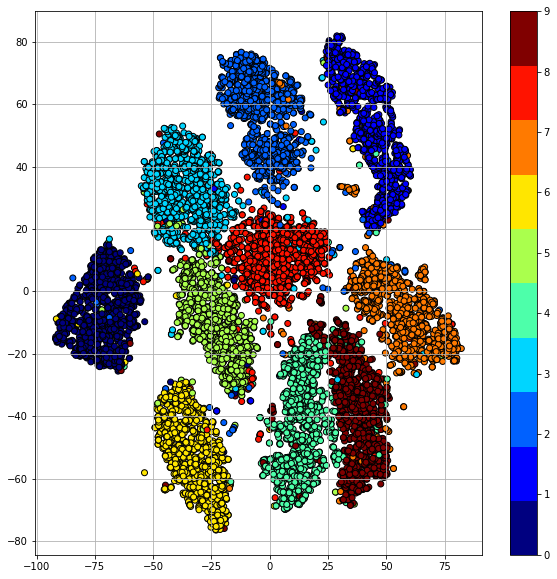

In [12]:
with torch.no_grad():
    model = trainer.model
    model.eval()
    z=[];label=[]
    for x,y in trainer.val_loader:

        z_, logvar = model.encoder(x.to(trainer.device))
        z += z_.cpu().tolist()
        label += y.cpu().tolist()
    z = np.asarray(z)
    label = np.asarray(label)

from VAE_starter1 import scatter_plot
scatter_plot(latent_representations=z,labels=label)

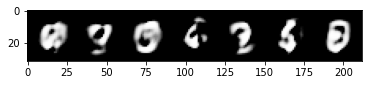

In [14]:
with torch.no_grad():
    samples = torch.randn(7, 30).to(trainer.device)
    samples = trainer.model.decoder(samples).cpu()

images = samples

from VAE_starter import display_images_in_a_row
display_images_in_a_row(images)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Original images


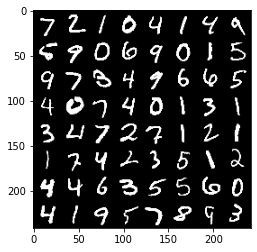

In [15]:
images = trainer.get_val_set() # get the entire validation set
total_number = 64
images = images[:total_number]

from VAE_starter import display_images_in_a_row
print("Original images")
display_images_in_a_row(images.cpu())

Reconstructed images


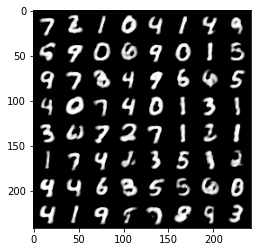

In [17]:
with torch.no_grad():
    images = images.to(trainer.device)
    reconstructed = trainer.model(images)[0].cpu()
print("Reconstructed images")
display_images_in_a_row(reconstructed)